In [1]:
import torch
import torchvision.datasets as datasets
import torchvision
from matplotlib import pyplot as plt
import torch.nn as nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
import os
import numpy as np

c:\Users\HP\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\HP\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\HP\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#Loading the data
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

#Splitting the data into train and validation sets.
train_data, val_data = torch.utils.data.random_split(train_data, [50000, 10000])

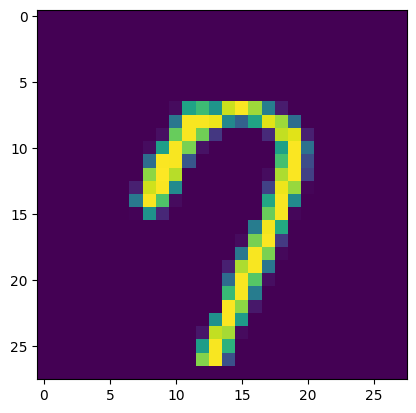

In [3]:
#Visualizing the input
plt.imshow(train_data[1][0].reshape((28,28)))
plt.show()

•input<br>
•conv1 (32 3×3 filters, stride 1, zero padding 1)<br>
•2×2 maxpool with stride 2<br>
•conv2 (32 3×3 filters, stride 1, zero padding 1)<br>
•2×2 maxpool with stride 2<br>
•fully connected layer (500 outputs)<br>
•fully connected layer (10 outputs)<br>
•softmax classifier<br>

In [4]:
class CustomTensorDataset(Dataset):
    def __init__(self, data_tensor, target_tensor):
        self.data_tensor = data_tensor
        self.target_tensor = target_tensor
    def __len__(self):
        return self.data_tensor.shape[1]

    def __getitem__(self, idx):
        x = self.data_tensor[:,idx]
        y = self.target_tensor[:,idx]
        return x,y

In [5]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return self.x.shape[1]
    def __getitem__(self, idx):
        X = self.x[:,idx]
        Y = self.Y[:,idx]
        return X,Y

In [6]:
class CNN_Network(nn.Module):
    def __init__(self):
        super(CNN_Network, self).__init__()
        self.conv1 = nn.Conv2d( 1, 32, kernel_size=3, stride=1, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d( 32, 32, kernel_size=3, stride=1, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(7*7*32, 500)
        self.fc2 = nn.Linear(500, 10)

        self.act = nn.ReLU()
        self.softmax = nn.LogSoftmax()
    def forward(self, x):
        layer_outputs = []
        x = self.conv1(x)
        #layer_outputs.append(x)
        x = self.act(x)
        layer_outputs.append(x)
        x = self.maxpool1(x)
        layer_outputs.append(x)
        x = self.conv2(x)
        #layer_outputs.append(x)
        x = self.act(x)
        layer_outputs.append(x)
        x = self.maxpool2(x)
        layer_outputs.append(x)
        x = x.view(x.size(0),-1)
        #layer_outputs.append(x)

        output = self.fc1(x)
        output = self.act(output)
        
        output = self.fc2(output)
        layer_outputs.append(output)
        output = self.softmax(output)
        return output,x, layer_outputs
        

In [52]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size = 100, shuffle = True)

In [53]:
train_loss = [ ]
test_loss = []

In [54]:
len(val_loader
    )

100

In [75]:
def test(test_loader,s='Test'):
  test_acc = []
  Network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      #print(data)
      output,_,_ = Network(data)
      #print(output, type(target))
      test_loss += criterion(output, target).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  print('\n',s,'set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))
  return 100. * correct / len(test_loader.dataset)

In [76]:
def train_model(epoch):
    Network.train()
    count = 200
    for idx, (image, target) in enumerate(trainloader):
        optimizer.zero_grad()
        #target = target.view(target.shape[0],1)
        #print(idx, image.shape, target.shape)
        output,inter,_ = Network(image)
        #target = one_hot_encoding(target)
        #print(output.shape, target.shape)
        loss_val = criterion(output, target)
        loss_val.backward()
        optimizer.step()
        if(idx%count==0):
            print("Train Epoch: {} [{}/{} ({:.0f}%)] Loss: {:.6f}".format(epoch+1,idx*len(image),len(train_data),100.*idx*len(image)/len(train_data),loss_val.item()))
            train_loss.append(loss_val.item())
    val_accuracy = test(val_loader,'Validation')
    train_accuracy = test(trainloader, 'Training')
    return train_accuracy, val_accuracy 
    

C:\Users\HP\AppData\Local\Temp\ipykernel_13500\1817506450.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


Train Epoch: 1 [0/50000 (0%)] Loss: 2.302500
Train Epoch: 1 [12800/50000 (26%)] Loss: 0.194697
Train Epoch: 1 [25600/50000 (51%)] Loss: 0.127711
Train Epoch: 1 [38400/50000 (77%)] Loss: 0.040488

 Validation set: Avg. loss: 7.8580, Accuracy: 9778/10000 (98%)


 Training set: Avg. loss: 47.8400, Accuracy: 49062/50000 (98%)

Train Epoch: 2 [0/50000 (0%)] Loss: 0.019408
Train Epoch: 2 [12800/50000 (26%)] Loss: 0.052766
Train Epoch: 2 [25600/50000 (51%)] Loss: 0.037611
Train Epoch: 2 [38400/50000 (77%)] Loss: 0.020614

 Validation set: Avg. loss: 5.7506, Accuracy: 9800/10000 (98%)


 Training set: Avg. loss: 30.9107, Accuracy: 49370/50000 (99%)

Train Epoch: 3 [0/50000 (0%)] Loss: 0.103277
Train Epoch: 3 [12800/50000 (26%)] Loss: 0.099296
Train Epoch: 3 [25600/50000 (51%)] Loss: 0.015685
Train Epoch: 3 [38400/50000 (77%)] Loss: 0.054096

 Validation set: Avg. loss: 5.3426, Accuracy: 9829/10000 (98%)


 Training set: Avg. loss: 22.8468, Accuracy: 49536/50000 (99%)

Train Epoch: 4 [0/50000 (

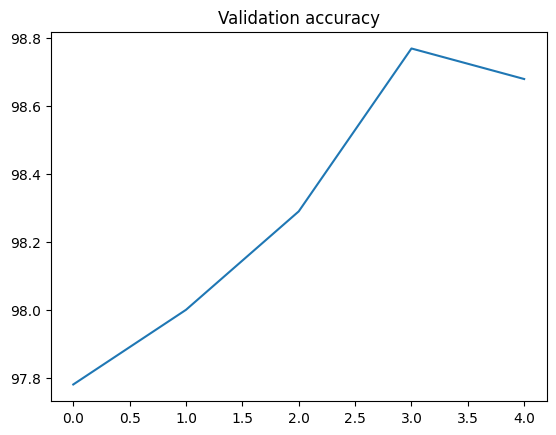

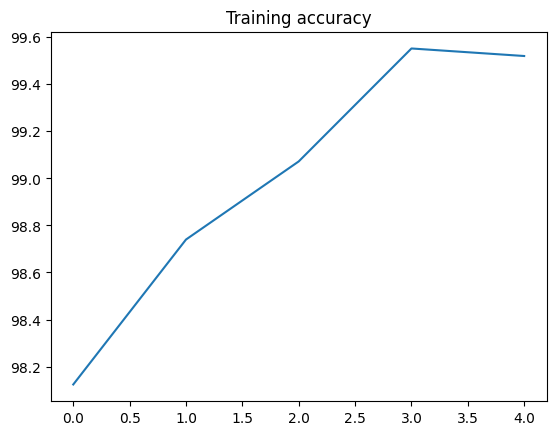

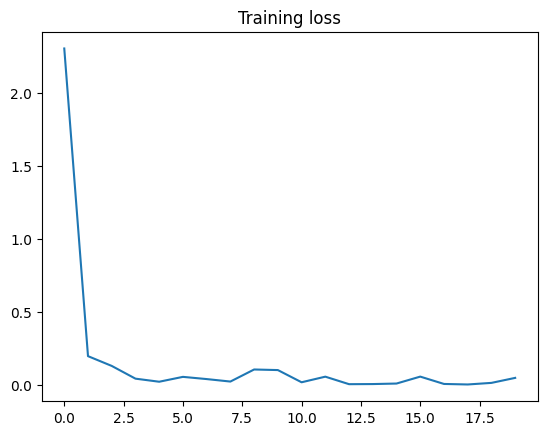

In [79]:
#Visualizing the training and validation acuuracy for 5 epochs
learning_rate = 0.001
Network = CNN_Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(Network.parameters(), lr = learning_rate)


val_acc = []
train_acc = []
train_loss = []
for epoch in range(5):
    t,v = train_model(epoch)
    val_acc.append(v)
    train_acc.append(t)
path = os.getcwd() + "\\Network.model"
torch.save(Network,path)

plt.plot(val_acc)
plt.title("Validation accuracy")
plt.show()
plt.plot(train_acc)
plt.title("Training accuracy")
plt.show()
plt.plot(train_loss)
plt.title("Training loss")
plt.show()

#### Calculating the test accuracy

In [81]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size= 100,shuffle=True)
_ = test(test_loader)

C:\Users\HP\AppData\Local\Temp\ipykernel_13500\1817506450.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)



 Test set: Avg. loss: 3.7932, Accuracy: 9877/10000 (99%)



### Calculating Number of Parameters

In [89]:
Network.parameters

<bound method Module.parameters of CNN_Network(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (act): ReLU()
  (softmax): LogSoftmax(dim=None)
)>

In [94]:
num_parameters = sum([p.numel() for p in Network.parameters()])
print("Total Number of paramters are: ", num_parameters)
num_parameters_fc = 1568*500+500 + 500*10 + 10
print("Number of paramters in fully connected layers is ", num_parameters_fc,",The percentage is ",num_parameters_fc/num_parameters*100,"%\nThats a lot of parameters in fc layers!!!")


Total Number of paramters are:  799078
Number of paramters in fully connected layers is  789510 ,The percentage is  98.80262001957256 %
Thats a lot of parameters in fc layers!!!


### Using Batch normalization

In [ ]:
class CNN_Network_with_batch_norm(nn.Module):
    def __init__(self):
        super(CNN_Network, self).__init__()
        self.conv1 = nn.Conv2d( 1, 32, kernel_size=3, stride=1, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d( 32, 32, kernel_size=3, stride=1, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(7*7*32, 500)
        self.fc2 = nn.Linear(500, 10)

        self.act = nn.ReLU()
        self.softmax = nn.LogSoftmax()
    def forward(self, x):
        layer_outputs = []
        x = self.conv1(x)
        #layer_outputs.append(x)
        x = self.act(x)
        layer_outputs.append(x)
        x = self.maxpool1(x)
        layer_outputs.append(x)
        x = self.conv2(x)
        #layer_outputs.append(x)
        x = self.act(x)
        layer_outputs.append(x)
        x = self.maxpool2(x)
        layer_outputs.append(x)
        x = x.view(x.size(0),-1)
        #layer_outputs.append(x)

        output = self.fc1(x)
        output = self.act(output)
        
        output = self.fc2(output)
        layer_outputs.append(output)
        output = self.softmax(output)
        return output,x, layer_outputs

# Visualizing the Convolutional neural network

### Visualizing conv1 filter

In [192]:
conv1_filters = Network.state_dict()['conv1.weight']

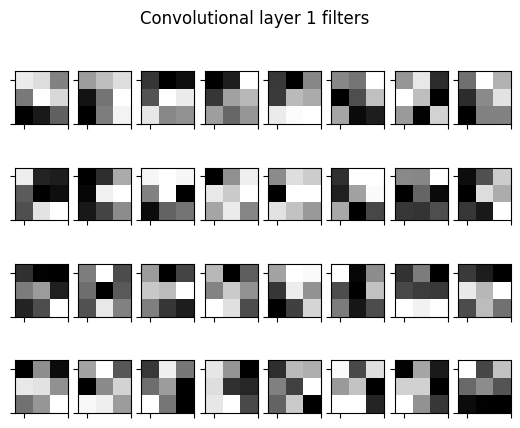

In [195]:
fig, ax = plt.subplots(nrows=4, ncols=8)
count = 0
fig.suptitle("Convolutional layer 1 filters")
for r in range(4):
    for c in range(8):
        ax[r,c].imshow(conv1_filters[count].view((3,3)), cmap='gray')
        ax[r,c].set(xticklabels=[])
        ax[r,c].set(yticklabels=[])
        count = count + 1
plt.show()

### Visualizing Conv2 filters

In [197]:
conv2_filters = Network.state_dict()['conv2.weight']
conv2_filters = conv2_filters.view((32*32,3,3))

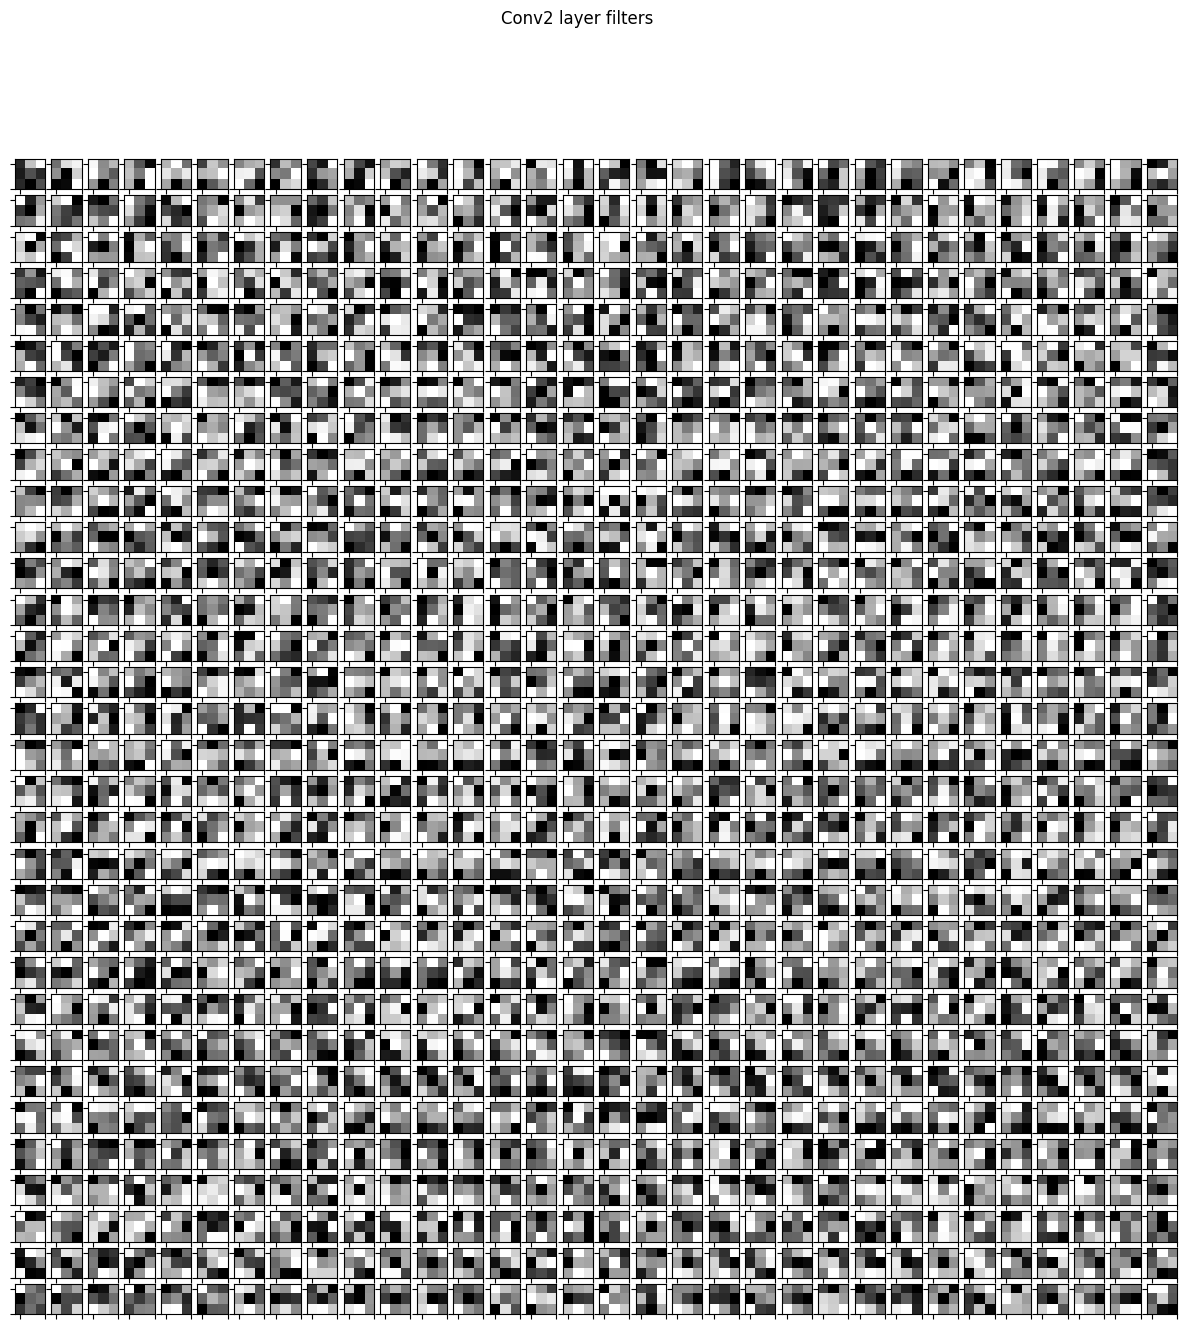

In [260]:
fig, ax = plt.subplots(nrows=32, ncols=32)
count = 0
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Conv2 layer filters")

for j in range(32*32):
    r = j//32
    c = j%32
    ax[r,c].imshow(conv2_filters[j].view((3,3)), cmap='gray')
    ax[r,c].set(xticklabels=[])
    ax[r,c].set(yticklabels=[])
plt.show()

### Observation on filters:
- It can be seen that conv1 layer filters tend to capture more generic features like horizontal lines, where as <br>
  Conv2 filters seemes to be specific.

### Visualize the activations of the convolutional layers

In [199]:
test_example = enumerate(test_loader)
i,j = next(test_example)

In [200]:
test_val = test_data[0][0].view((1,1,28,28))
output,x,l = Network(test_val)

C:\Users\HP\AppData\Local\Temp\ipykernel_4780\1817506450.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


In [201]:
for_plot = l[0][0].detach()
for_plot = np.array(for_plot)

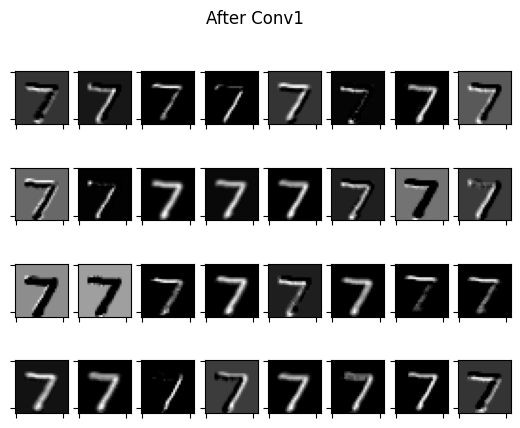

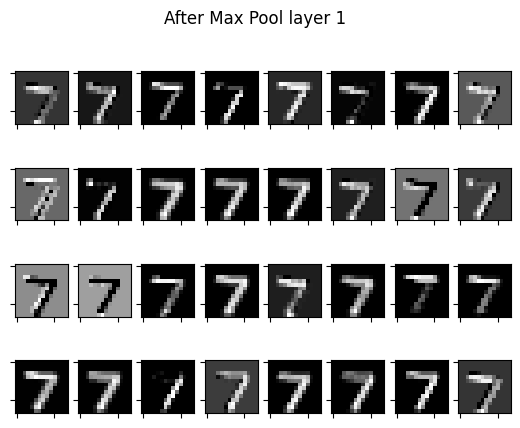

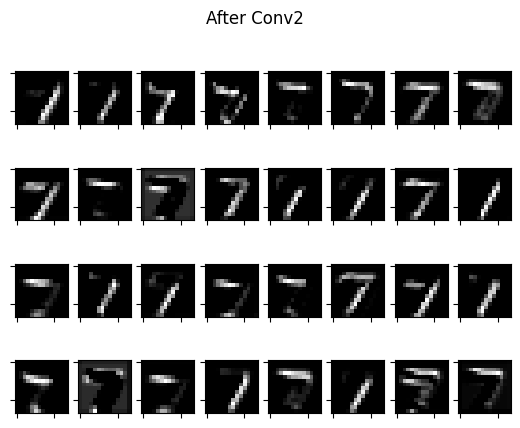

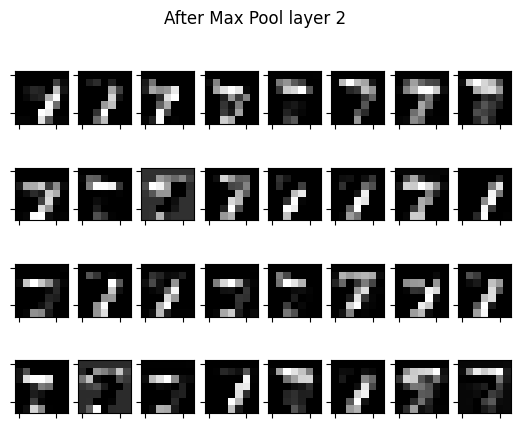

In [202]:
'''This block of code visualizes the activations of Conv1, MaxPool1, Conv2, MaxPool2 layer activations'''

for i in range(4):
    fig, ax = plt.subplots(nrows=4, ncols=8)
    count = 0
    for_plot = l[i][0].detach()
    for_plot = np.array(for_plot)
    vals = [28,14,14,7]
    titles = ["After Conv1", "After Max Pool layer 1","After Conv2", "After Max Pool layer 2"]
    fig.suptitle(titles[i])
    for r in range(4):
        for c in range(8):
            ax[r,c].imshow(for_plot[count].reshape((vals[i],vals[i])), cmap='gray')
            ax[r,c].set(xticklabels=[])
            ax[r,c].set(yticklabels=[])
            count = count + 1

#### Observations
- The image size reduces and the receptive field of filters in deeper layers is more.
- In first convolutions operation it appears the noise in the data is reduced.
- After the second convolutional layer we can see edges (like diagonal, vertical lines are emerging).

### Occluding parts of images

In [203]:
random_indices = np.random.randint(0,60000,10)
pick_10_random_images = []
for i in random_indices:
    pick_10_random_images.append(train_data[i])

In [204]:

predictions_for_the_images = []
correct_predictions = 0
for i in pick_10_random_images:
    output,_,_ = Network(i[0].view((1,1,28,28)))
    output = output.data.max(1, keepdim=True)[1]
    output = int(output[0][0])
    predictions_for_the_images.append(output)
    if(output == i[1]):
        correct_predictions = correct_predictions + 1
print(predictions_for_the_images)
print("Number of correct predictions=", correct_predictions)

[5, 7, 5, 2, 1, 5, 6, 9, 3, 2]
Number of correct predictions= 10


C:\Users\HP\AppData\Local\Temp\ipykernel_4780\1817506450.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


All of them are correctly predicted<br>
Now let's occlude some parts of the image.

In [206]:
def put_a_patch_on_image(real_image, patch_size = 5, location = [0,0]):
    '''Location is the top left corner of patch.
        This function puts a patch on the image of size 5 X 5.
    '''
    image = torch.tensor(real_image)
    for i in range(patch_size):
        for j in range(patch_size):
            image[0][location[0] + i][location[1] + j] = 0.5
    # plt.imshow(image[0])
    # plt.show()
    return image

In [207]:
locations = np.array([0,0])
for i in range(0,23,2):
    for j in range(0,23,2):
        locations = np.vstack((locations, np.array([i,j])))
locations = locations[1:]

In [208]:
plot_proab = torch.zeros((12,12))
for i in pick_10_random_images:
    real_image = i[0]
    p_test = i[0].clone().detach()
    #print(p_test.shape)
    for j in locations:
        edited_image = put_a_patch_on_image(real_image, location=j)
        p_test = torch.cat((p_test, edited_image), dim = 0)
    p_test = p_test[1:]
    p_test = p_test.reshape((144,1,28,28))
    model_prediction, _, _ = Network(p_test)
    model_prediction = model_prediction.data.max(1, keepdim=True)[1]
    count = 0
    for j in model_prediction:
        plot_proab[count//12][count%12] = plot_proab[count//12][count%12] + int(j[0]==i[1])
        count = count + 1

C:\Users\HP\AppData\Local\Temp\ipykernel_4780\1638297364.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(real_image)
C:\Users\HP\AppData\Local\Temp\ipykernel_4780\1817506450.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


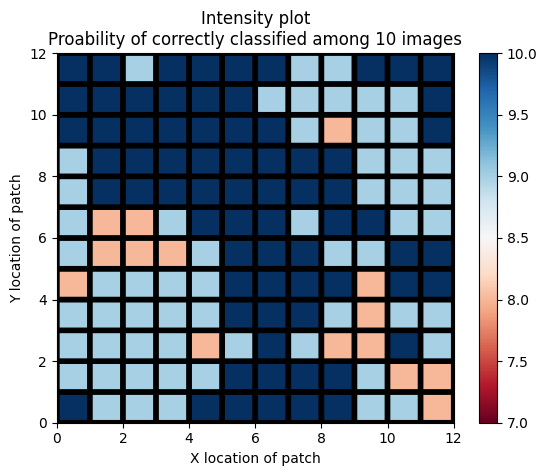

In [222]:
# plt.imshow(plot_proab)
c = plt.pcolor(plot_proab, edgecolors='k', linewidths=4, cmap='RdBu', vmin=7.0, vmax=10.0)
plt.colorbar(c)
plt.title("Intensity plot\nProability of correctly classified among 10 images")
plt.xlabel("X location of patch")
plt.ylabel("Y location of patch")
plt.show()

In [214]:
plot_proab

tensor([[10.,  9.,  9.,  9., 10., 10., 10., 10., 10.,  9.,  9.,  8.],
        [ 9.,  9.,  9.,  9.,  9., 10., 10., 10., 10.,  9.,  8.,  8.],
        [ 9.,  9.,  9.,  9.,  8.,  9., 10.,  9.,  8.,  8., 10.,  9.],
        [ 9.,  9.,  9.,  9.,  9., 10., 10., 10.,  9.,  8.,  9.,  9.],
        [ 8.,  9.,  9.,  9.,  9., 10., 10., 10., 10.,  8., 10., 10.],
        [ 9.,  8.,  8.,  8.,  9., 10., 10., 10.,  9.,  9., 10., 10.],
        [ 9.,  8.,  8.,  9., 10., 10., 10.,  9., 10., 10.,  9.,  9.],
        [ 9., 10., 10., 10., 10., 10., 10., 10., 10.,  9.,  9.,  9.],
        [ 9., 10., 10., 10., 10., 10., 10., 10., 10.,  9.,  9.,  9.],
        [10., 10., 10., 10., 10., 10., 10.,  9.,  8.,  9.,  9., 10.],
        [10., 10., 10., 10., 10., 10.,  9.,  9.,  9.,  9.,  9., 10.],
        [10., 10.,  9., 10., 10., 10., 10.,  9.,  9., 10., 10., 10.]])

# 3 Adversarial Example

### 3.1 Non Targeted attack

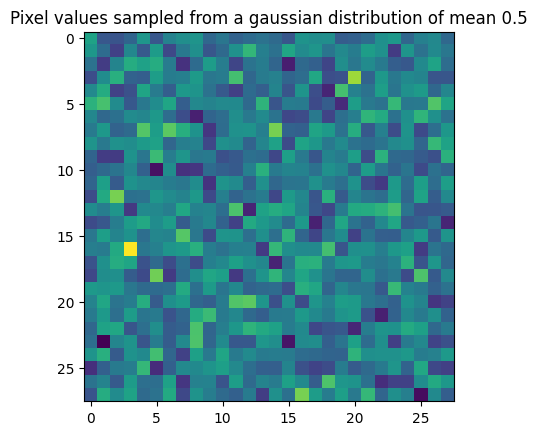

In [163]:
gaussian_data = torch.randn((1,28,28))*0.5+0.5
plt.imshow(gaussian_data[0])
plt.title("Pixel values sampled from a gaussian distribution of mean 0.5")
plt.show()

In [165]:
def non_targeted_attack(targeted_class, epochs=200, show_diagnosis = 0):
    gaussian_data = torch.randn((1,1,28,28))*0.5+0.5
    good_plot = gaussian_data
    optim_1 = optim.Adam(Network.parameters(), lr = learning_rate)
    step_size = 0.1
    gaussian_data = torch.tensor(gaussian_data, requires_grad=True)
    loss_store = []
    prediction_store = []
    for i in range(epochs):
        optim_1.zero_grad()
        output,_,l = Network(gaussian_data)
        cost_function = l[-1][0][targeted_class]
        prediction = output.data.max(1, keepdim=True)[1]
        prediction_store.append(prediction.item())
        loss_store.append(cost_function.item())

        cost_function.backward()
        d = gaussian_data.grad
        temp_plot = torch.tensor(gaussian_data.clone().detach())

        temp_plot = temp_plot + step_size*d
        #good_plot = torch.cat((good_plot, temp_plot), axis=0)
        gaussian_data = torch.tensor(temp_plot, requires_grad=True)
        if(i%10==0):
            good_plot = torch.cat((good_plot, temp_plot), axis=0)
    good_plot = good_plot[1:]
    if(show_diagnosis==1):
        plt.plot(loss_store)
        plt.title('Cost function C = Logit[Targeted Class]')
        plt.xlabel("Epochs")
        plt.show()
        plt.plot(prediction_store)
        plt.title('Prediction from the network')
        plt.xlabel("Epochs")
        plt.show()
    return good_plot, gaussian_data
        

1. Show the generated image for each of the MNIST classes.

C:\Users\HP\AppData\Local\Temp\ipykernel_4780\4111443539.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gaussian_data = torch.tensor(gaussian_data, requires_grad=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_4780\1817506450.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)
C:\Users\HP\AppData\Local\Temp\ipykernel_4780\4111443539.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_plot = torch.tensor(gaussian_data.clone().detach())
C:\Users\HP\AppData\Local\Temp\ipykernel_4780\4111443539.py:23: UserWarning: To copy construct from a tensor, it is recommended to use 

Netork output:  0
Netork output:  1
Netork output:  2
Netork output:  3
Netork output:  4
Netork output:  5
Netork output:  6
Netork output:  7
Netork output:  8
Netork output:  9


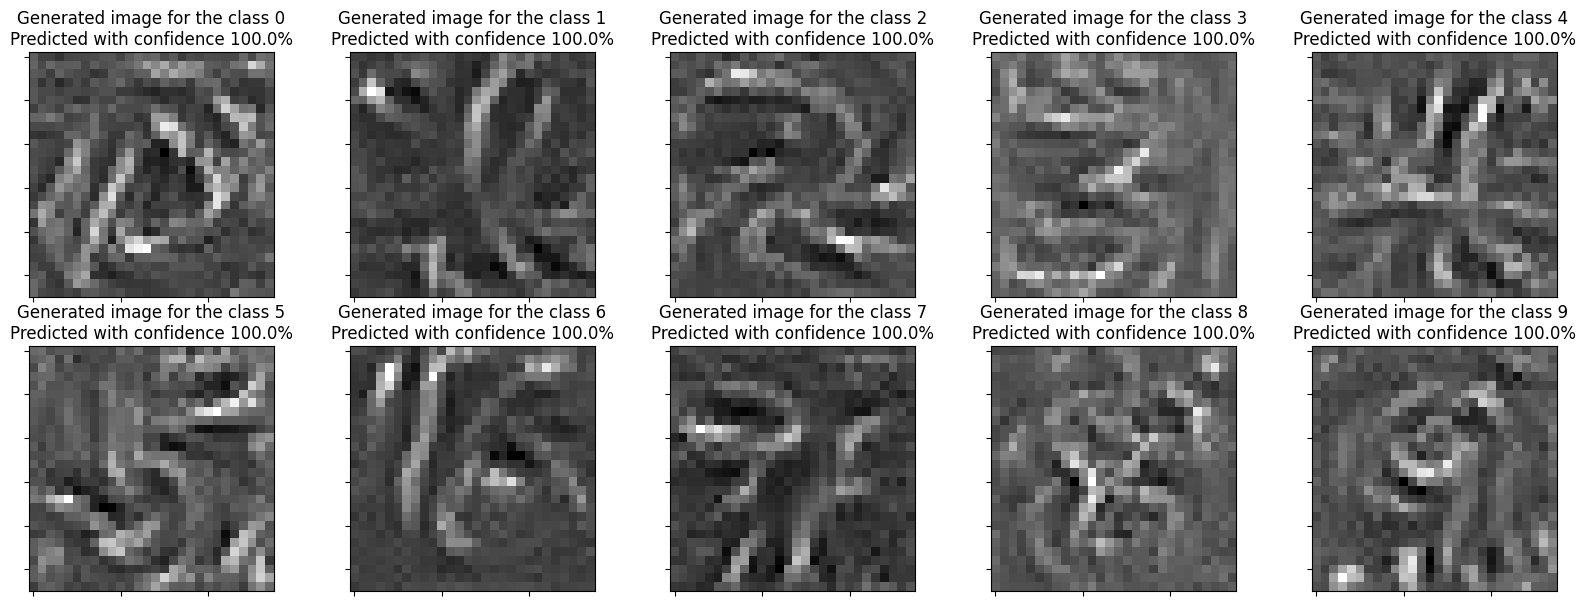

In [190]:
'''Generated images for different classes'''

targeted_classes = np.linspace(0,9,10, dtype=int)

row = 2
cols = 5
fig, ax = plt.subplots(nrows=row, ncols=cols)
count = 0
fig.set_figheight(7)
fig.set_figwidth(20)
for i in range(10):
    _, gaussian_data = non_targeted_attack(targeted_classes[i], epochs=100)
    o, _, _ = Network(gaussian_data)
    print("Netork output: ", o.max(1, keepdim=True)[1].item())
    temp = gaussian_data.clone().detach().requires_grad_(False)
    s = "Generated image for the class " + str(targeted_classes[i]) + "\nPredicted with confidence "+str(torch.exp(o).max(1,keepdim=True)[0].item()*100)+"%"
    r = i//cols
    c = i%cols
    ax[r,c].imshow(temp.view((28,28)), cmap='gray')
    ax[r,c].set(xticklabels=[])
    ax[r,c].set(yticklabels=[])
    ax[r,c].set_title(s)
plt.show()

- As seem from above the Network classifies the generated images with very high proability.<br>
- The Generated images does not look like the handwritten images when one glances over them<br>
  but if you take a closer look you can see the structure of the image faintly.
- See the cost function plot below, it increase because we are adding the gradients to the<br>
  image.

C:\Users\HP\AppData\Local\Temp\ipykernel_4780\4111443539.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gaussian_data = torch.tensor(gaussian_data, requires_grad=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_4780\1817506450.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)
C:\Users\HP\AppData\Local\Temp\ipykernel_4780\4111443539.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp_plot = torch.tensor(gaussian_data.clone().detach())
C:\Users\HP\AppData\Local\Temp\ipykernel_4780\4111443539.py:23: UserWarning: To copy construct from a tensor, it is recommended to use 

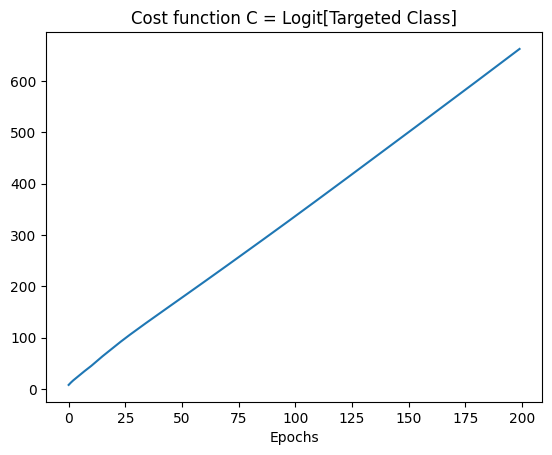

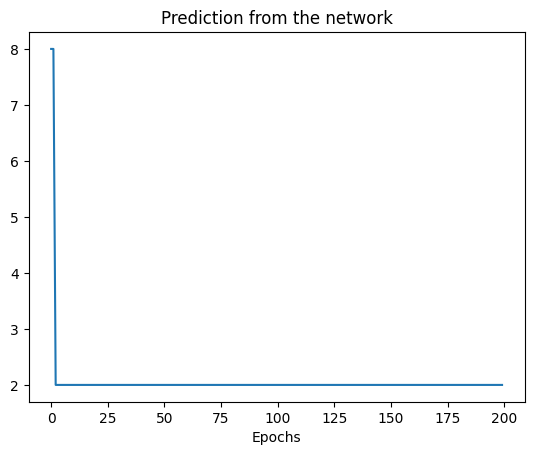

In [191]:
_, gaussian_data = non_targeted_attack(targeted_classes[2], epochs=200, show_diagnosis=1)

### 3.2 Targeted Advaserial attack

In [79]:
def mean_square_error(img1, img2):
    return torch.sum((img1-img2)**2)

In [148]:
def targeted_attack(targeted_class, targeted_image, epochs = 2000, show_diagnosis = 0):
    
    targeted_image = targeted_image.view((1,1,28,28))
    targeted_image = targeted_image.clone().detach().requires_grad_(True)
    beta = 1
    learning_rate = 0.01
    step_size = 0.01

    gaussian_data = torch.randn((1,1,28,28))*0.5+0.5
    good_plot = gaussian_data
    optim_1 = optim.Adam(Network.parameters(), lr = learning_rate)
    gaussian_data = gaussian_data.clone().detach().requires_grad_(True)
    loss_store = []
    prediction_store = []
    for i in range(epochs):
        optim_1.zero_grad()
        output,_,l = Network(gaussian_data)
        #print(torch.sum((gaussian_data-targeted_image)**2))
        mean_square_er = mean_square_error(gaussian_data, targeted_image)
        cost_function = l[-1][0][targeted_class] - beta * mean_square_er
        #print(l[-1][0][targeted_class], mean_square_er )
        prediction = output.data.max(1, keepdim=True)[1]
        prediction_store.append(prediction.item())
        loss_store.append(cost_function.item())

        cost_function.backward()
        d = gaussian_data.grad
        
        temp_plot = gaussian_data.clone().detach()

        temp_plot = temp_plot + step_size*d
        gaussian_data = temp_plot.clone().detach().requires_grad_(True)
        if(i%100==0):
            good_plot = torch.cat((good_plot, temp_plot), axis=0)
    good_plot = good_plot[1:]
    if(show_diagnosis==1):
        plt.plot(loss_store)
        plt.title('Cost function C = Logit[TargetedClass] - Beta*MSE')
        plt.show()
        plt.plot(prediction_store)
        plt.title("What does the network predict")
        plt.xlabel("epochs")
        plt.ylabel("Network prediction")
        plt.show()

    return good_plot,gaussian_data, loss_store, prediction_store

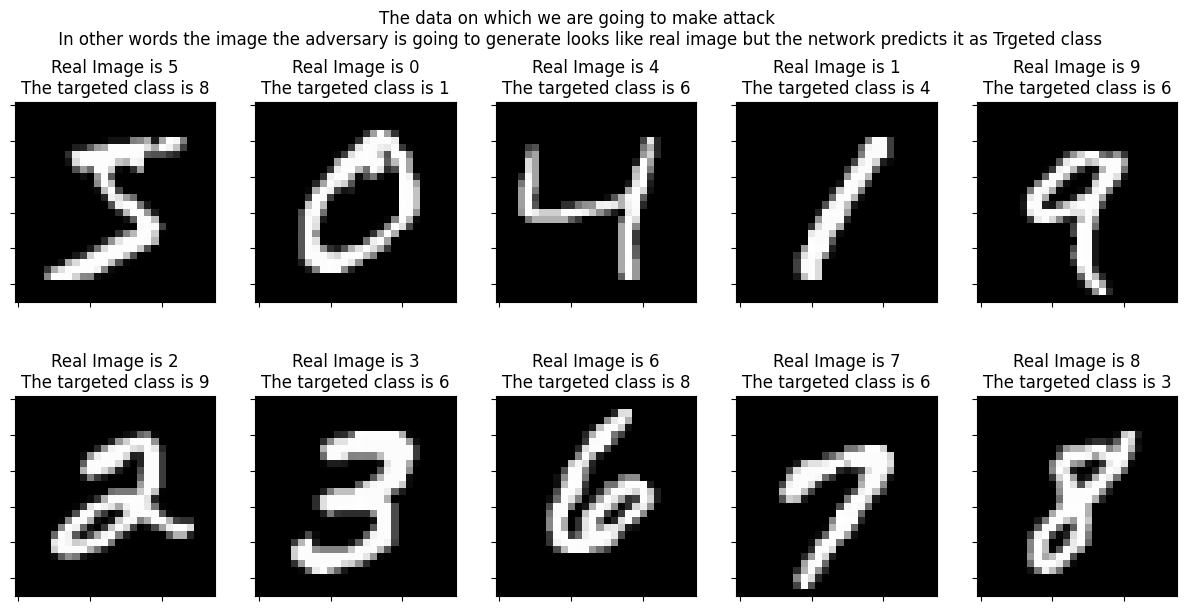

In [131]:
'''This block creates the data for targeted_attack() function.
Since we want to see what happens to different MNIST classes under target_attack
'''

targeted_images = []
targeted_classes = []
temp = np.ones((10)) - 2
count = 0
i = 0
while(count<=9): 
    if(temp[train_data[i][1]]==-1):
        targeted_images.append(train_data[i])
        temp1 = np.random.randint(0,10,1)
        while(temp1==train_data[i][1]):
            temp1 = np.random.randint(0,10,1)
        targeted_classes.append(temp1)
        temp[train_data[i][1]] = 1
        count = count + 1
    i = i + 1


row = 2
cols = 5
fig, ax = plt.subplots(nrows=row, ncols=cols)
count = 0
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle("The data on which we are going to make attack\n In other words the image the adversary is going to generate\
             looks like real image but the network predicts it as Trgeted class\n")
for r in range(row):
    for c in range(cols):
        ax[r,c].imshow(targeted_images[count][0].view((28,28)), cmap='gray')
        ax[r,c].set(xticklabels=[])
        ax[r,c].set(yticklabels=[])
        s = "Real Image is " + str(targeted_images[count][1]) +  '\n' + "The targeted class is " + str(targeted_classes[count][0]) 
        ax[r,c].set_title(s)
        count = count + 1

C:\Users\HP\AppData\Local\Temp\ipykernel_4780\1817506450.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


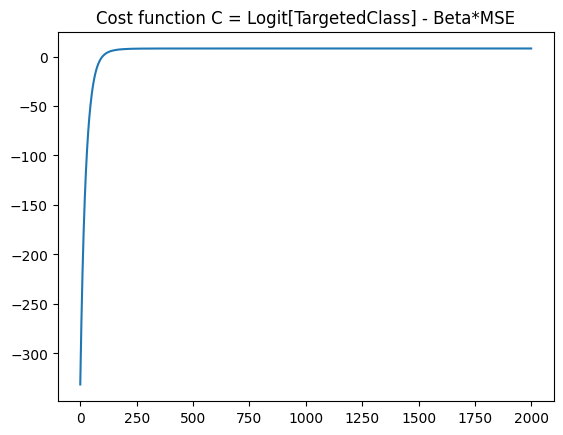

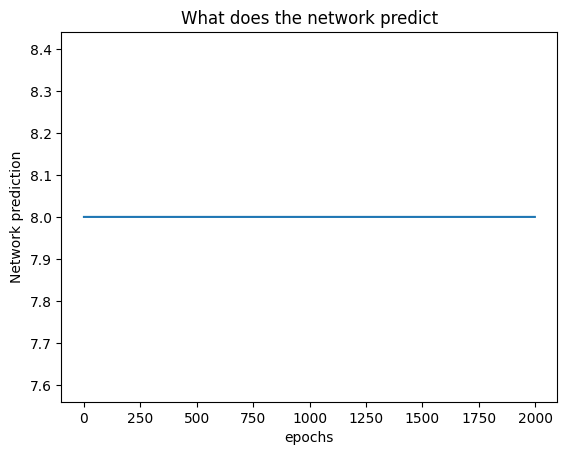

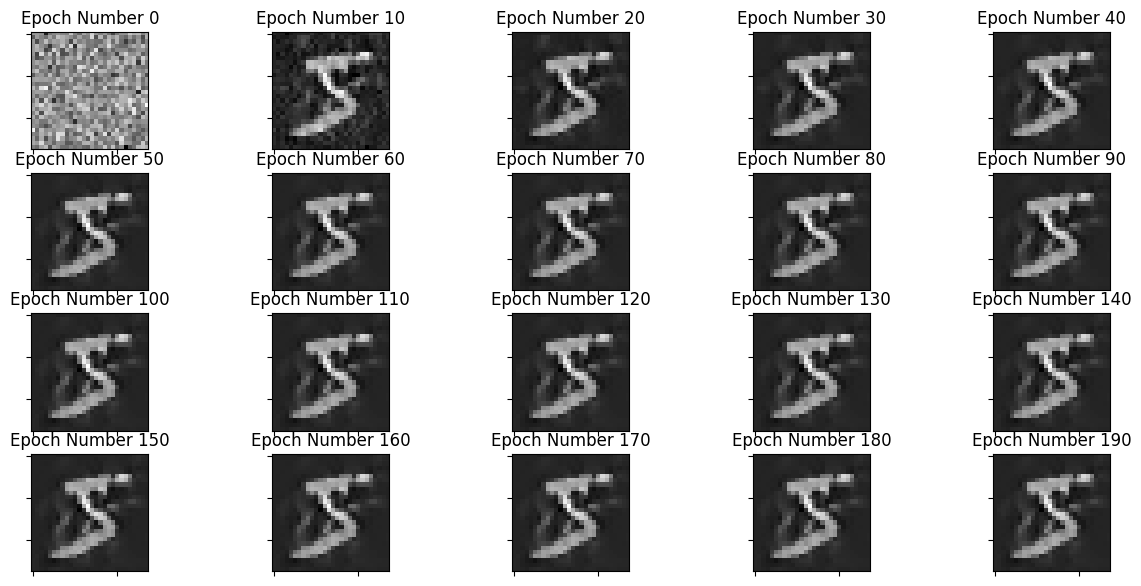

Netork output:  tensor([8])


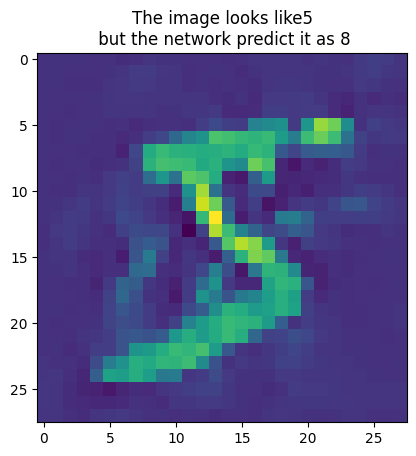

In [149]:
'''
Let's look at in detail analysis of a single example.
Consider here the image should look like 5 but the network shold predit it as 8.
'''

good_plot, gaussian_data, _,_ = targeted_attack(targeted_classes[0][0], targeted_images[0][0], show_diagnosis=1)
row = 4
cols = 5
fig, ax = plt.subplots(nrows=row, ncols=cols)
count = 0
fig.set_figheight(7)
fig.set_figwidth(15)
for r in range(row):
    for c in range(cols):
        ax[r,c].imshow(good_plot[count].view((28,28)), cmap='gray')
        ax[r,c].set(xticklabels=[])
        ax[r,c].set(yticklabels=[])
        s = "Epoch Number "
        s = s + str(count*10)
        ax[r,c].set_title(s)
        count = count + 1
plt.show()
o, _, _ = Network(gaussian_data)
print("Netork output: ", o.data.max(1)[1])
temp = gaussian_data.clone().detach().requires_grad_(False)
plt.imshow(temp.view((28,28)))
s = "The image looks like" + str(targeted_images[0][1]) + "\n but the network predict it as " + str(targeted_classes[0][0])
plt.title(s)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4780\1817506450.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


Netork output:  tensor([8])
Netork output:  tensor([0])
Netork output:  tensor([6])
Netork output:  tensor([4])
Netork output:  tensor([6])
Netork output:  tensor([9])
Netork output:  tensor([6])
Netork output:  tensor([8])
Netork output:  tensor([6])
Netork output:  tensor([3])


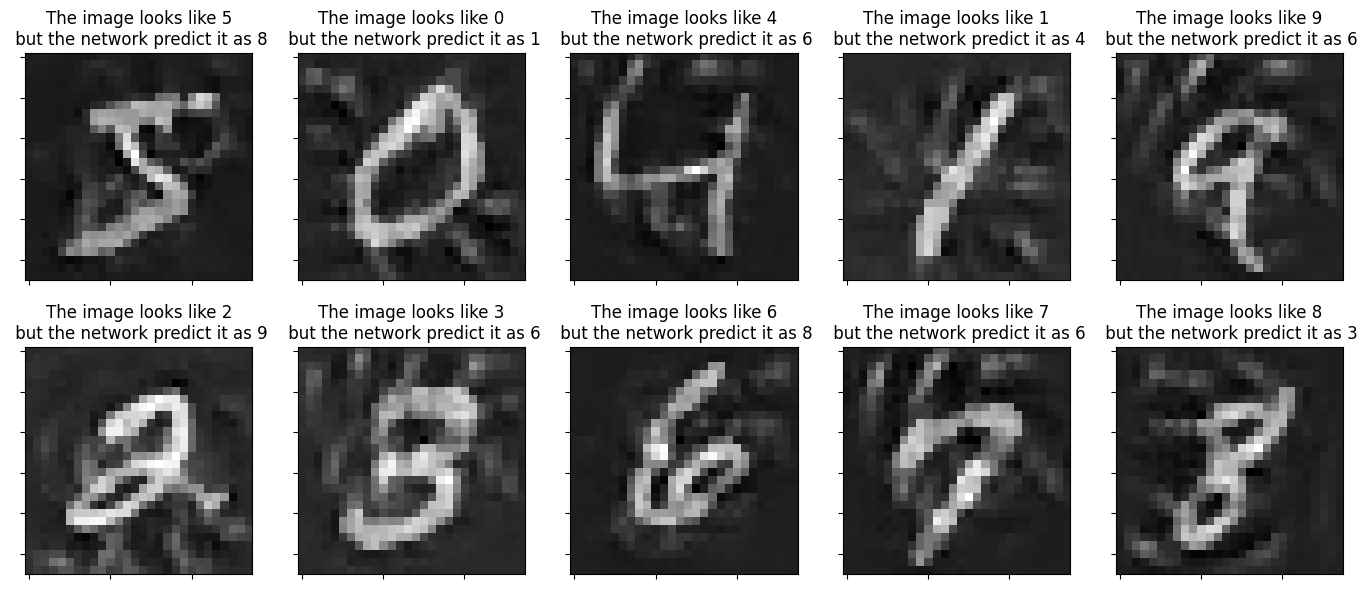

In [161]:
'''Lets see what happens to all the mnist clasess'''

row = 2
cols = 5
fig, ax = plt.subplots(nrows=row, ncols=cols)
count = 0
fig.set_figheight(7)
fig.set_figwidth(17)
for i in range(10):
    _, gaussian_data, _, _ = targeted_attack(targeted_classes[i][0], targeted_images[i][0], epochs=250)
    o, _, _ = Network(gaussian_data)
    print("Netork output: ", o.data.max(1)[1])
    temp = gaussian_data.clone().detach().requires_grad_(False)
    s = "The image looks like " + str(targeted_images[i][1]) + "\n but the network predict it as " + str(targeted_classes[i][0])
    r = i//cols
    c = i%cols
    ax[r,c].imshow(temp.view((28,28)), cmap='gray')
    ax[r,c].set(xticklabels=[])
    ax[r,c].set(yticklabels=[])
    ax[r,c].set_title(s)
plt.show()